In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images
train_images = train_images.reshape(-1, 28*28)
test_images = test_images.reshape(-1, 28*28)


11490434/11490434 [==============================] - 0s 0us/step


# Define the Multi-Layer Perceptron model

In [3]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(28*28,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model

In [4]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model

In [5]:
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 1.0712 - accuracy: 0.6890 - val_loss: 0.4328 - val_accuracy: 0.8746
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3759 - accuracy: 0.8909 - val_loss: 0.3139 - val_accuracy: 0.9084
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2998 - accuracy: 0.9129 - val_loss: 0.2626 - val_accuracy: 0.9210
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2588 - accuracy: 0.9243 - val_loss: 0.2338 - val_accuracy: 0.9292
Epoch 5/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2293 - accuracy: 0.9340 - val_loss: 0.2119 - val_accuracy: 0.9381
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2069 - accuracy: 0.9402 - val_loss: 0.1932 - val_accuracy: 0.9411
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1887 - accuracy: 0.9446 - val_loss: 0.1923 - val_accuracy: 0.9417
Epoch

# Visualization of training loss and accuracy

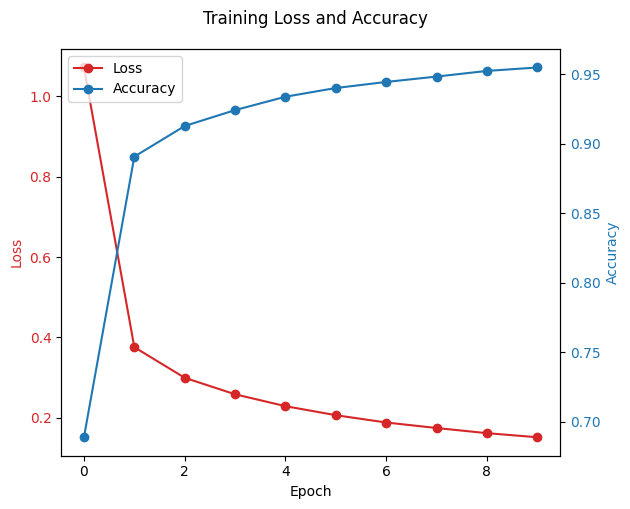

In [6]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(history.epoch, history.history['loss'], marker='o', color=color, label='Loss')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(history.epoch, history.history['accuracy'], marker='o', color=color, label='Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.suptitle('Training Loss and Accuracy', y=1.05)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

# Evaluation

In [7]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test Accuracy: {test_accuracy:.4f}')

313/313 - 1s - loss: 0.1529 - accuracy: 0.9555 - 514ms/epoch - 2ms/step
Test Accuracy: 0.9555


# Visualization of some test images and their predictions

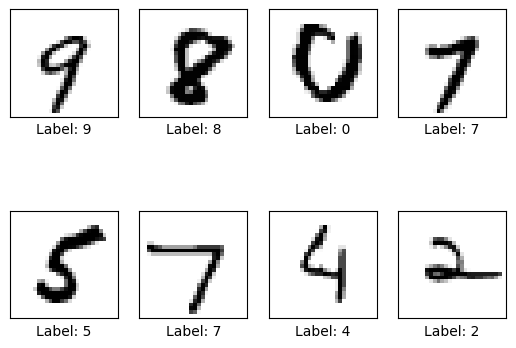

1/1 [==============================] - 0s 143ms/step


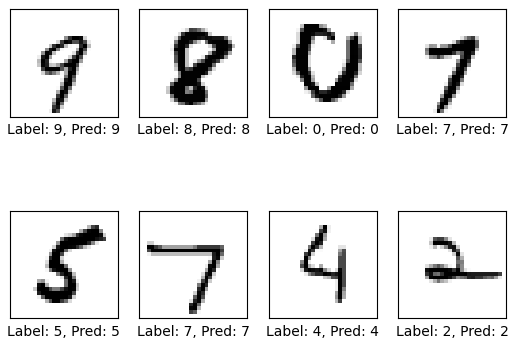

In [9]:
def plot_images(images, labels, predictions=None):
    plt.figure()
    for i in range(8):
        plt.subplot(2, 4, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        if predictions is None:
            plt.xlabel(f"Label: {labels[i]}")
        else:
            plt.xlabel(f"Label: {labels[i]}, Pred: {predictions[i]}")
    plt.show()

# Get some random test images
indices = np.random.choice(len(test_images), 8)
sample_images = test_images[indices]
sample_labels = test_labels[indices]

# Show images with ground truth labels
plot_images(sample_images, sample_labels)

# Predict labels for the sample images
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Show images with predicted labels
plot_images(sample_images, sample_labels, predicted_labels)